## K Means Clustering Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
X.shape

(1000, 2)

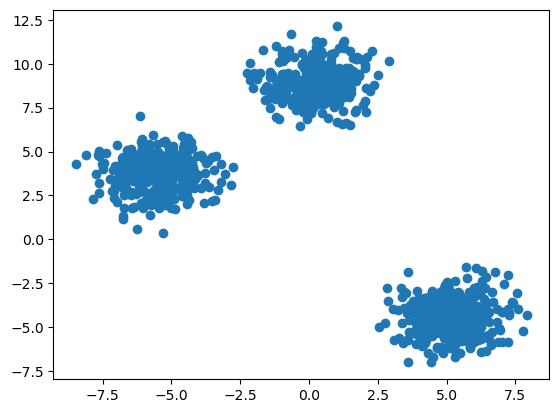

In [7]:
plt.scatter(X[:,0],X[:,1])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
from sklearn.cluster import KMeans

In [10]:
## Manual Process
## Elbow Method to select the K value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [11]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 991.8238694516631,
 853.5801796457041,
 754.5616351506642,
 662.7565100887674,
 578.4392462894705,
 533.0725265508637]

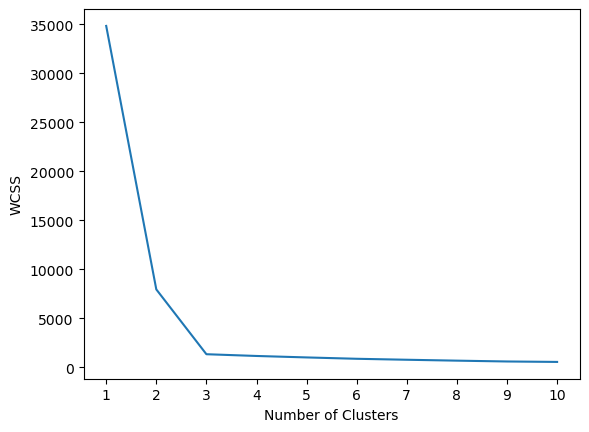

In [12]:
## Elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [14]:
y_labels=kmeans.fit_predict(X_train)

In [17]:
y_test_label=kmeans.predict(X_test)

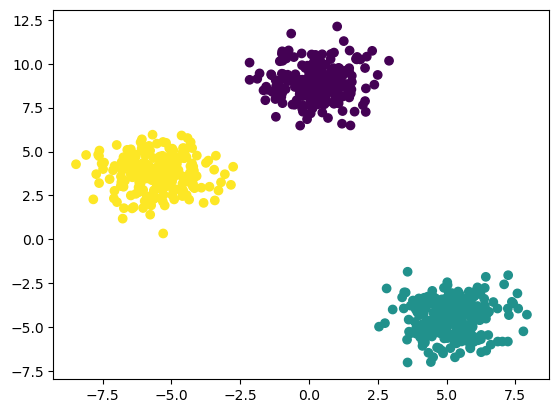

In [15]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

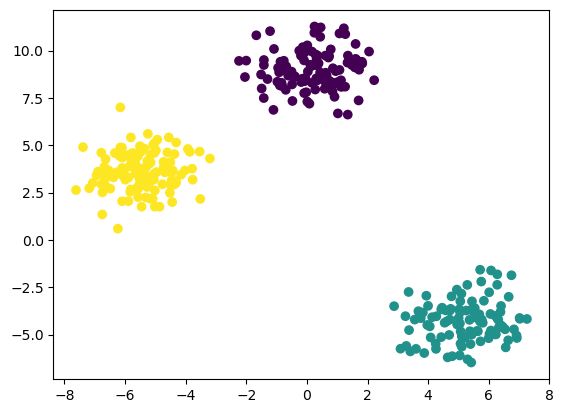

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [21]:
## knee locator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [24]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [26]:
## Performance metrins
## Silhoutte score
from sklearn.metrics import silhouette_score

In [28]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [29]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.3383975138989348,
 0.3442959350461067,
 0.34545962196393554,
 0.3421535562956744,
 0.3345097478103064]

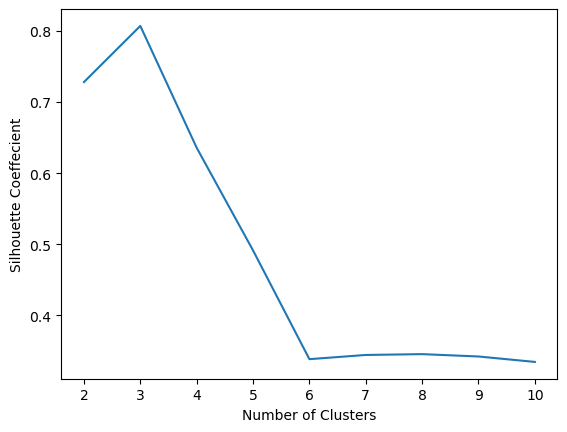

In [30]:
## Plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coeffecient")
plt.show()